In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

In [2]:
func1 = ss.norm(loc=3.0,scale=0.5)
x = np.arange(0.5,10.0,0.02)
y1 = func1.pdf(x)*20000./0.2*0.04
func2= ss.norm(loc=5.0,scale=0.35)
y2 = func2.pdf(x)*40000./0.2*0.04
tot = y1+y2
xxgrid = np.arange(0.0,8.0,0.01)

60000


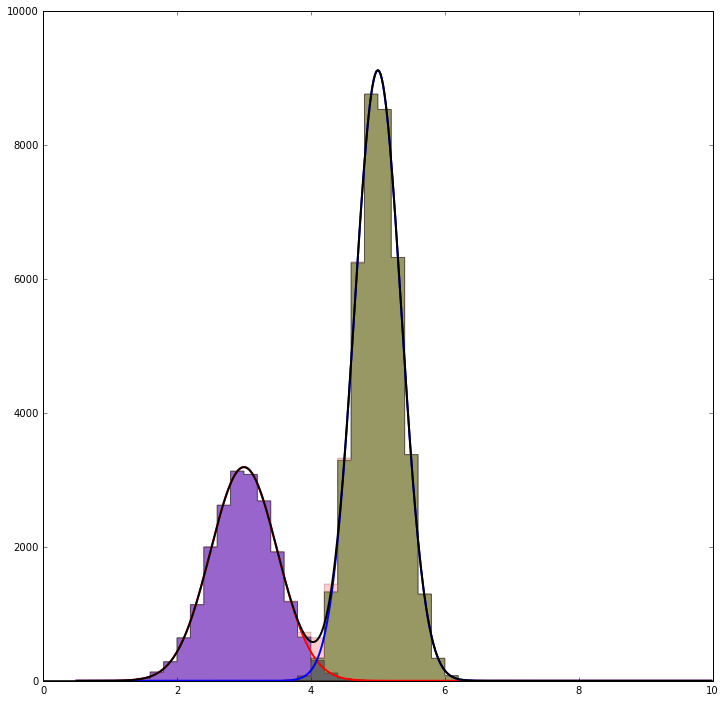

In [3]:
samples1 = np.array(func1.rvs(size=20000))
samples2 = np.array(func2.rvs(size=40000))
bigsample = np.append(samples1,samples2)
print len(bigsample)
fig = plt.figure(figsize=(12,12))
plt.hist(samples1, normed=False, histtype='stepfilled', alpha=0.5,bins=np.arange(0.0,10.0,0.2))
plt.hist(samples2, normed=False, histtype='stepfilled', alpha=0.5,bins=np.arange(0.0,10.0,0.2))
plt.hist(bigsample,normed=False,histtype='stepfilled',alpha=0.2,bins=np.arange(0.0,10.0,0.2))
plt.plot(x,y1,lw=2,c='r')
plt.plot(x,y2,lw=2,c='b')
plt.plot(x,tot,lw=2,c='k')

In [4]:
smallgrid=np.zeros([2,len(y1)])
smallgrid[0,:] = tot
smallgrid[1,:] = tot
approx_pdf = qp.Ensemble(smallgrid.shape[0],gridded=(x,smallgrid))

made the pool of 4 in 0.0273540019989
made the catalog in 0.0158259868622


In [5]:
xxtmparray = np.arange(0.0,10.0,0.1)
tmpstackpz = approx_pdf.stack(loc=xxtmparray,using='gridded',vb=True)
xstack = tmpstackpz['gridded'][0]
ystack = tmpstackpz['gridded'][1]


In [6]:
xsamplepdf = qp.PDF(samples=bigsample)
testsamplegrid = xsamplepdf.evaluate(xxgrid,'samples',True,False)

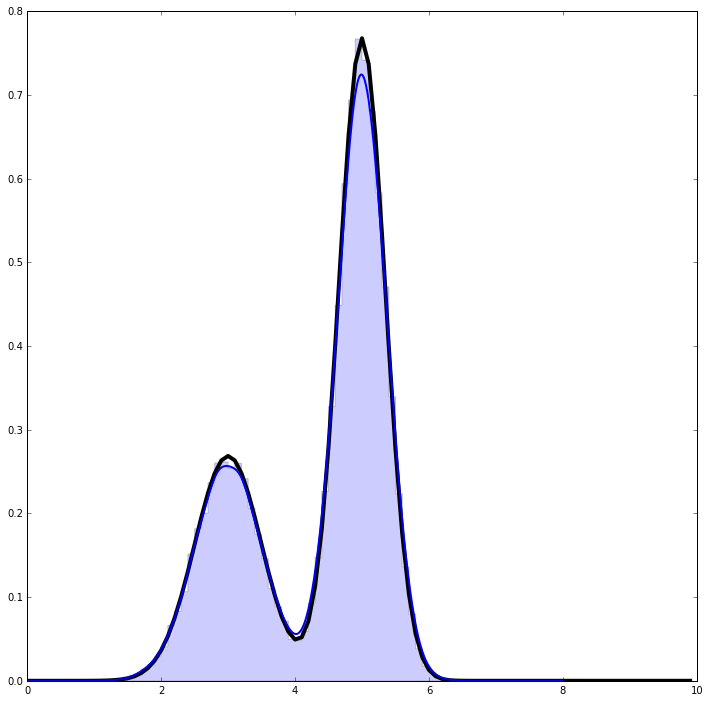

In [7]:
fig = plt.figure(figsize=(12,12))
plt.plot(xstack,ystack,lw=4,c='k')
plt.hist(bigsample, normed=True, histtype='stepfilled', alpha=0.2,bins=np.arange(0.,10.,0.1))
plt.plot(testsamplegrid[0],testsamplegrid[1],lw=2,c='b')

In [8]:
nzobj = inmet.NzSumEvaluateMetric(approx_pdf,bigsample,eval_grid=x,using='gridded',dx=0.0001)

In [9]:
ks_stat,ks_pval = nzobj.NZKS()

In [10]:
print ks_stat
print ks_pval

0.00222439887702
0.927222801286


In [11]:
cvm_stat,cvm_pval = nzobj.NZCVM()
print cvm_stat
print cvm_pval

0.0366600448852
0.949546417504


In [12]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 2.0, vmax=5.0, delv=0.01)
print ad_stat
print ad_pval

using 2.000000 and 5.000000 for vmin and vmax

0.883572956503
0.424509532038


In [13]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 1.0, vmax=6.0, delv = 0.05)
print ad_stat
print ad_pval

using 1.000000 and 6.000000 for vmin and vmax

0.268706517025
0.959657270737


In [14]:
low = min(bigsample)
high = max(bigsample)
print low,high

1.14896328259 6.45154996841


In [33]:
ad_stat,ad_pval=nzobj.NZAD(vmin=1.15,vmax=6.44,delv=0.01)
print ad_stat
print ad_pval

using 1.150000 and 6.440000 for vmin and vmax

3.12661842971
0.0236132670738


# test calculation of KL divergence, need to create a qp.PDF object from the samples

Created a KDE interpolator for the samples parametrization.
interpolating between 1.14896328259 and 6.45154996841 using samples
Plotted samples


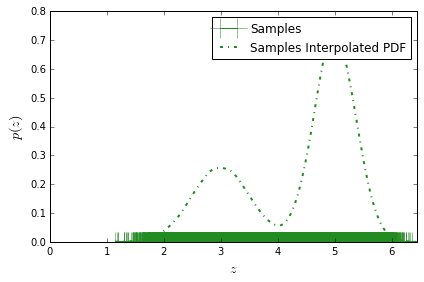

In [21]:
samplepdf = qp.PDF(samples=bigsample)
samplepdf.plot()

In [22]:
print nzobj.stackpz

In [23]:
kldtest = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(0.0,8.0),dx=0.0001,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.9999 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.9999 using gridded
almost normalized integrals


In [24]:
print kldtest

0.00177269317214


In [25]:
kldtestx = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(0.0,8.0),dx=0.005,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.995 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.995 using gridded
almost normalized integrals


In [26]:
print kldtestx

0.00177389275442


In [27]:
kldtestxx = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(0.0,8.0),dx=0.05,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.95 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.95 using gridded
almost normalized integrals


In [28]:
print kldtestxx

0.00177750277078


Not super sensitive to dx!

Compare a narrower range in the limits

In [34]:
kldtestxx = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(1.2,6.2),dx=0.025,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 1.2 and 6.175 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 1.2 and 6.175 using gridded
almost normalized integrals


In [35]:
print kldtestxx

0.00173642389587


In [36]:
kldtestxx = qp.utils.calculate_kl_divergence(samplepdf,nzobj.stackpz,limits=(1.6,5.8),dx=0.025,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 1.6 and 5.775 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 1.6 and 5.775 using gridded
almost normalized integrals


In [37]:
print kldtestxx

0.00159386984992


compare to a pdf created only from one of the two Gaussians, the first 20,000 read in as samples

In [29]:
badpdftest = qp.PDF(samples=bigsample[:20000])

Created a KDE interpolator for the samples parametrization.
interpolating between 1.14896328259 and 5.05686357181 using samples
Plotted samples


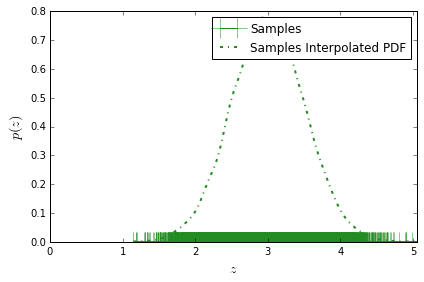

In [30]:
badpdftest.plot()

In [31]:
kldtest = qp.utils.calculate_kl_divergence(badpdftest,nzobj.stackpz,limits=(0.0,8.0),dx=0.001,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 7.999 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.0 and 7.999 using gridded
almost normalized integrals


In [32]:
print kldtest

1.05373766008
